In [1]:
import pandas as pd
df= pd.read_csv('../data/raw/train.csv')

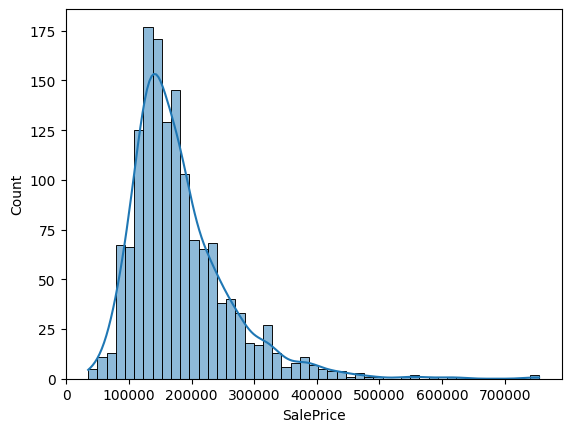

np.float64(1.8828757597682129)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df["SalePrice"],kde=True)
plt.show()
df["SalePrice"].describe()
df["SalePrice"].skew()

The target variable is right-skewed, meaning most houses are moderately priced while a few very expensive houses create a long right tail

In [3]:
numeric_features = []
ordinal_features = []
nominal_features = []

Numeric: Real measurements or counts
Ordinal:Categories with a clear order
Nominal:Categories with no order

In [4]:
numeric_features.extend([
    "LotFrontage",
    "LotArea",
    "GrLivArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GarageArea",
    "GarageCars",
    "YearBuilt",
    "YearRemodAdd",
    "YrSold",
    "MoSold"
])

ordinal_features.extend([
    "OverallQual",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond"
])

nominal_features.extend([
    "Neighborhood",
    "MSZoning",
    "HouseStyle",
    "BldgType",
    "RoofStyle",
    "Exterior1st",
    "Exterior2nd",
    "Foundation",
    "SaleType",
    "SaleCondition"
])

In [5]:
missing=df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Several features (PoolQC, Fence, FireplaceQu) have missing values because many houses do not have these features

These missing values are meaningful and represent absence rather than data errors

Such features should not be dropped and will require careful handling later

Group 1:Structural Missing
1. PoolQC
2. MiscFeature
3. Alley
4. Fence
5. FireplaceQu
6. GarageType       
7. GarageYrBlt       
8. GarageFinish      
9. GarageQual        
10. GarageCond        
11. BsmtFinType2      
12. BsmtExposure      
13. BsmtFinType1      
14. BsmtCond          
15. BsmtQual          
16. MasVnrType

Group 2: Missing Data
1. LotFrontage
2. MasVnrArea
3. Electrical


In [6]:
qual_map={
    "Po":1,
    "Fa":2,
    "TA":3,
    "Gd":4,
    "Ex":5
}

ordinal_cols=[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond"
]

for col in ordinal_cols:
    df[col]=df[col].fillna("Po")

In [7]:
df[ordinal_cols].describe()


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
count,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,4,5,5,4,5,4,5,5,5
top,TA,TA,TA,TA,Ex,TA,Po,TA,TA
freq,906,1282,649,1311,741,735,710,1311,1326


In [8]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [10]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [11]:
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

In [12]:
structural_cat_cols = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtFinType2", "BsmtExposure", "BsmtFinType1",
    "BsmtCond", "BsmtQual", "MasVnrType"
]

for col in structural_cat_cols:
    df[col] = df[col].fillna("None")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [13]:
df.isnull().sum().max()

np.int64(0)

In [14]:
import numpy as np
df["SalePrice_Log"] = np.log(df["SalePrice"])

In [15]:
X = df.drop(columns=["SalePrice", "SalePrice_Log"])
y = df["SalePrice_Log"]

In [16]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(0.17309120595421085)

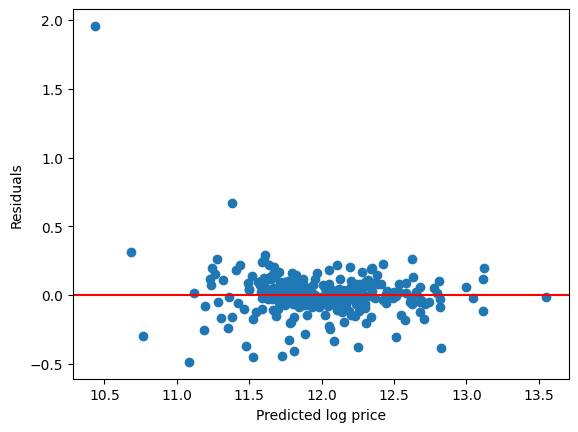

In [18]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted log price")
plt.ylabel("Residuals")
plt.show()

In [19]:
residuals = y_test - y_pred

outliers = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_test,
    "Residual": residuals
}).sort_values(by="Residual", ascending=False)

outliers.head(5)

,Predicted,Actual,Residual
271,10.437468,12.394625,1.957157
1170,11.379859,12.049419,0.669559
636,10.686949,11.002100,0.315151
365,11.609672,11.898188,0.288516
774,12.621955,12.886641,0.264686


In [20]:
outliers.tail(5)

,Predicted,Actual,Residual
581,12.826800,12.442302,-0.384497
479,11.810405,11.401670,-0.408736
589,11.725251,11.283512,-0.441738
1432,11.524545,11.074421,-0.450124
30,11.083393,10.596635,-0.486758


In [21]:
outlier_indices = outliers.head(5).index
df.loc[outlier_indices]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Log
271,272,20,RL,73.0,39104,Pave,None,IR1,Low,AllPub,...,None,None,None,0,4,2008,WD,Normal,241500,12.394625
1170,1171,80,RL,76.0,9880,Pave,None,Reg,Lvl,AllPub,...,Gd,GdPrv,None,0,7,2008,WD,Normal,171000,12.049419
636,637,30,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,1,2009,ConLw,Normal,60000,11.002100
365,366,70,RM,59.0,10690,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,7,2009,WD,Normal,147000,11.898188
774,775,20,RL,110.0,14226,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,7,2007,New,Partial,395000,12.886641


Inspection of extreme residuals shows that outliers correspond to legitimate but heterogeneous properties (e.g., large lots, high-end or atypical sales). These were retained, as errors stem from linear model limitations rather than data quality issues.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
rmse_gbr

np.float64(0.13920077751728793)

Model Performance Comparison

- Baseline Model (Linear Regression)**  
  Validation RMSE (log scale): 0.174

- Gradient Boosting Regressor
  Validation RMSE (log scale): 0.139


Gradient Boosting reduces validation error by ~20% compared to the linear baseline,
indicating strong non-linear interactions between size, quality, and location features
that linear regression fails to capture.

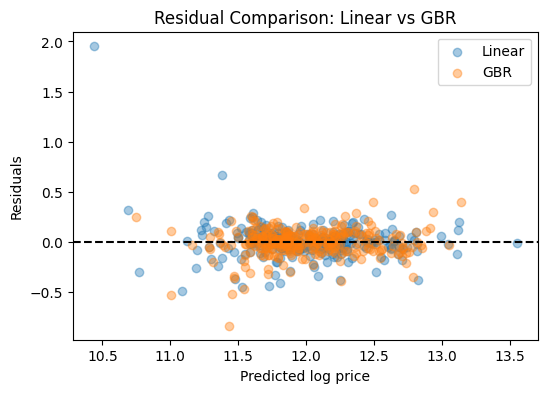

In [23]:
residuals_gbr = y_test - y_pred_gbr

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.4, label="Linear")
plt.scatter(y_pred_gbr, residuals_gbr, alpha=0.4, label="GBR")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.xlabel("Predicted log price")
plt.ylabel("Residuals")
plt.title("Residual Comparison: Linear vs GBR")
plt.show()

In [24]:
feature_importance = pd.Series(
    gbr.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


OverallQual       0.431026
GrLivArea         0.189759
YearBuilt         0.049899
TotalBsmtSF       0.043960
GarageCars        0.042502
BsmtFinSF1        0.027069
YearRemodAdd      0.025252
FireplaceQu_Po    0.024886
GarageArea        0.023993
LotArea           0.018324
dtype: float64

Feature Importance

The most influential features include overall quality, above-ground living area,
basement size, and neighborhood indicators. This aligns with domain expectations,
suggesting the model is learning meaningful structure rather than noise.
